In [1]:
from torchsummary import summary
import matplotlib.pyplot as plt
from FCN import MNISTClassifier
from utils import *

In [2]:
model = MNISTClassifier(784, 128, 64, 10)
summary(model, (784, ))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Flatten: 2-1                      [-1, 784]                 --
|    └─Linear: 2-2                       [-1, 128]                 100,480
|    └─ReLU: 2-3                         [-1, 128]                 --
|    └─Linear: 2-4                       [-1, 64]                  8,256
|    └─ReLU: 2-5                         [-1, 64]                  --
|    └─Linear: 2-6                       [-1, 10]                  650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
Total mult-adds (M): 0.22
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.42
Estimated Total Size (MB): 0.42


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Flatten: 2-1                      [-1, 784]                 --
|    └─Linear: 2-2                       [-1, 128]                 100,480
|    └─ReLU: 2-3                         [-1, 128]                 --
|    └─Linear: 2-4                       [-1, 64]                  8,256
|    └─ReLU: 2-5                         [-1, 64]                  --
|    └─Linear: 2-6                       [-1, 10]                  650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
Total mult-adds (M): 0.22
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.42
Estimated Total Size (MB): 0.42

In [3]:
train, test = download_MNIST()

In [4]:
train_loader, test_loader = data_loaders(train, test, batch_size=64)

In [5]:
train_iter=iter(train_loader)
samples, labels=next(train_iter)
print(f"number of samples{samples.shape}")
print(f"number of labels {labels.shape}")

number of samplestorch.Size([64, 1, 28, 28])
number of labels torch.Size([64])


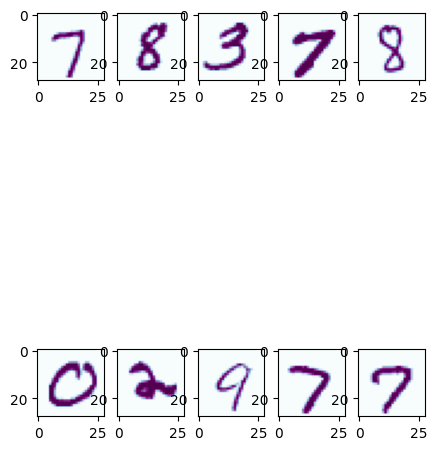

In [6]:
plt.figure(figsize=(5,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    
    plt.imshow(samples[i][0],cmap='BuPu')
plt.show()

In [7]:
optimizer = adam_optimizer(model, lr=5e-4)
criterion = cross_entropy_loss()
num_epochs = 100

In [8]:
model, log_dict = train_model(model, train_loader, optimizer, criterion, num_epochs)
torch.save(model, './models/model1.pth')

Epoch : 1/100
[1,   938] loss: 0.199, accuracy: 0.938
Epoch : 2/100
[2,   938] loss: 0.095, accuracy: 1.000
Epoch : 3/100
[3,   938] loss: 0.104, accuracy: 0.969
Epoch : 4/100
[4,   938] loss: 0.078, accuracy: 0.969
Epoch : 5/100
[5,   938] loss: 0.157, accuracy: 0.938
Epoch : 6/100
[6,   938] loss: 0.066, accuracy: 0.969
Epoch : 7/100
[7,   938] loss: 0.112, accuracy: 0.938
Epoch : 8/100
[8,   938] loss: 0.044, accuracy: 0.969
Epoch : 9/100
[9,   938] loss: 0.022, accuracy: 1.000
Epoch : 10/100
[10,   938] loss: 0.006, accuracy: 1.000
Epoch : 11/100
[11,   938] loss: 0.322, accuracy: 0.969
Epoch : 12/100
[12,   938] loss: 0.014, accuracy: 1.000
Epoch : 13/100
[13,   938] loss: 0.061, accuracy: 0.969
Epoch : 14/100
[14,   938] loss: 0.005, accuracy: 1.000
Epoch : 15/100
[15,   938] loss: 0.001, accuracy: 1.000
Epoch : 16/100
[16,   938] loss: 0.006, accuracy: 1.000
Epoch : 17/100
[17,   938] loss: 0.001, accuracy: 1.000
Epoch : 18/100
[18,   938] loss: 0.001, accuracy: 1.000
Epoch : 19

In [15]:
loaded_model = torch.load('./models/model1.pth')
model.load_state_dict(loaded_model.state_dict())

<All keys matched successfully>

In [16]:
val_loss, val_acc = test_model(loaded_model, test_loader, criterion)

In [17]:
print(f'Validation Loss : {(val_loss):.3f} - Validation accuracy : {(val_acc):.3f}')

Validation Loss : 0.003 - Validation accuracy : 0.015
